In [314]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

In [318]:
def clean_name(series): 
    new=[]
    for x in series:
        if x%1==0:
            new += [str(int(x))]

        else:
            new += [str(x)]
    return new

## Crimes 

In [655]:
crime = pd.read_csv('crimes.csv')
crime = crime.groupby(['NAME','Year']).size().unstack().fillna(0)

In [678]:
#population census tracts
p2010 = pd.read_csv('./demographics/2010_demographic.csv')
p2010 = p2010.set_index(p2010['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2010 = p2010.iloc[:,2]

p2011 = pd.read_csv('./demographics/2011_demographic.csv')
p2011 = p2011.set_index(p2011['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2011 = p2011.iloc[:,2]

p2012 = pd.read_csv('./demographics/2012_demographic.csv')
p2012 = p2012.set_index(p2012['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2012 = p2012.iloc[:,2]

p2013 = pd.read_csv('./demographics/2013_demographic.csv')
p2013 = p2013.set_index(p2013['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2013 = p2013.iloc[:,2]

p2014 = pd.read_csv('./demographics/2014_demographic.csv')
p2014 = p2014.set_index(p2014['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2014 = p2014.iloc[:,2]

p2015 = pd.read_csv('./demographics/2015_demographic.csv')
p2015 = p2015.set_index(p2015['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2015 = p2015.iloc[:,2]

p2016 = pd.read_csv('./demographics/2016_demographic.csv')
p2016 = p2016.set_index(p2016['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2016 = p2016.iloc[:,2]

p2017 = pd.read_csv('./demographics/2017_demographic.csv')
p2017 = p2017.set_index(p2017['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2017 = p2017.iloc[:,2]

p2018 = pd.read_csv('./demographics/2018_demographic.csv')
p2018 = p2018.set_index(p2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2018 = p2018.iloc[:,2]

lst_pop = [p2010,p2011,p2012,p2013,p2014,p2015,p2016,p2017,p2018]

In [691]:
crime['name']=clean_name(crime.index)
crime = crime.set_index('name')

In [734]:
#serious crimes/population 221
crime_chart = pd.DataFrame([crime.iloc[:,i]/lst_pop[i]for i in range(9)]).T*100
crime_chart.columns=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
diff = (crime_chart['2018']-crime_chart['2010'])
crime_chart['difference (2018 - 2010)']=abs_change
crime_chart = crime_chart.sort_values(by='difference (2018 - 2010)', ascending=False)
crime_chart.to_csv('crime 2010-2018.csv')

In [730]:
crime_chart.sort_values(by='difference (2018 - 2010)')

,2010,2011,2012,2013,2014,2015,2016,2017,2018,difference (2018 - 2010)
9803,133.333333,106.060606,155.555556,82.051282,86.666667,91.025641,68.539326,47.619048,9.090909,-124.242424
180,9.655369,8.335788,6.943292,7.411504,5.878713,5.447230,5.397987,7.907133,2.491103,-7.164266
176.01,7.251779,7.123616,7.798986,7.165422,6.121884,6.687014,5.820781,5.562144,1.665945,-5.585834
9809,17.771084,14.603175,13.946588,21.862348,15.853659,20.664207,26.153846,37.603306,12.867647,-4.903437
125.01,5.269571,6.566431,6.164384,8.633094,6.371582,6.303648,4.945355,4.664232,1.224388,-4.045183
...,...,...,...,...,...,...,...,...,...,...
426.01,0.026867,0.211808,0.098839,0.192957,0.145950,0.248324,0.071856,0.050556,0.078452,0.051585
615,NaN,1.710832,1.849680,1.885695,1.468808,2.070178,1.700237,1.658973,0.535303,NaN
615.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9804.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [649]:
buyouts = pd.read_csv('buyouts.csv')
elevation = pd.read_csv('elevation.csv')
coffee = pd.read_csv('coffee_sf_filtered.csv')

buyouts['name']=clean_name(buyouts.name)
buyouts = buyouts.set_index('name')
buyouts['year'] = pd.to_datetime(buyouts['Pre Buyout Disclosure Declaration Date']).dt.year
buyouts = buyouts[buyouts['year'].notna()]
grouped = buyouts.groupby(['name','year']).size().unstack().fillna(0)

elevation = elevation.set_index(elevation['name.1'].apply(lambda x: x[:-1]))

coffee['name']=clean_name(coffee.NAME)
coffee = coffee.set_index('name')
coffee = coffee.groupby(coffee.index).size()

In [650]:
buyouts
buyouts['date']= buyouts['Pre Buyout Disclosure Declaration Date'].apply(lambda x: x.replace('/','-'))
long = buyouts['point'].apply(lambda x: x.replace('POINT (','').strip().replace(' ',',').replace(')','').split(',')[0])
lat = buyouts['point'].apply(lambda x: x.replace('POINT (','').strip().replace(' ',',').replace(')','').split(',')[1])
buyouts['long']=long
buyouts['lat']=lat
buyouts[['long','lat','date','Buyout Amount','Number of Tenants']].to_csv('sf_buyouts.csv')


In [651]:
pca = pd.read_csv('pca_result')
pca['name']=clean_name(pca.name)
pca = pca.set_index('name')
pca['y'] = None
pca.loc[pca[(pca['2018']-pca['2010'])>0].index,'y']=1
pca.loc[pca[(pca['2018']-pca['2010'])<0].index,'y']=0
pca = pca.dropna()

In [652]:
elevation['max elevation']
pd.to_datetime(buyouts['Pre Buyout Disclosure Declaration Date']).dt.year

name
109        2017
109        2018
109        2017
109        2017
109        2016
           ... 
604        2017
9805.01    2018
9805.01    2017
332.03     2019
9803       2018
Name: Pre Buyout Disclosure Declaration Date, Length: 4138, dtype: int64

In [653]:
data = pca.merge(elevation['max elevation'],left_index=True,right_index=True)[['y','max elevation']]
data = data.merge(grouped,left_index=True,right_index=True)
data = data.merge(coffee.rename('coffee'),left_index=True,right_index=True)

X = data.iloc[:,1:]
y = data.iloc[:,0]
y=y.astype(int)

0.7777777777777778

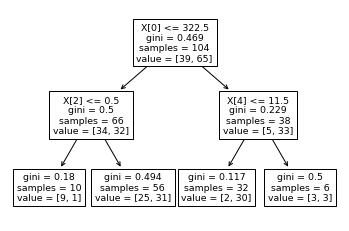

In [654]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=6)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf) 
clf.score(X_test,y_test)

In [436]:
len(X[:20])

20

In [437]:
diff = pca['2018']-pca['2010']
data = data.merge(diff.rename('new'),left_index=True,right_index=True)

In [241]:
X[2018]

101     2.0
102     7.0
103    17.0
104     9.0
106     5.0
       ... 
610     2.0
611     1.0
612     5.0
614     4.0
615     3.0
Name: 2018, Length: 180, dtype: float64

## PCA gentrificaiton map

In [568]:
sf = pd.read_csv('sf median income per census tract.csv')
sf['name'] = clean_name(sf.NAME)
sf = sf.set_index('name')

pca_map = pca.merge(sf['geometry'],left_index=True,right_index=True)
pca_map['diff']=pca_map['2018']-pca_map['2010']
pca_map.to_csv('pca_map.csv')

In [598]:
def modify(x):
    if x <0:
        return 0
    else: 
        return x/100000

pca_map['modified_diff'] = pca_map['diff'].apply(modify)*2
pca_map.to_csv('modified_pca_map.csv')

In [595]:
np.var(pca_map['modified_diff']*2)

84.12993235701798